**Credit Card Customers Data are acquired from Kaggle at https://www.kaggle.com/sakshigoyal7/credit-card-customers**


#### Description: <br>

A manager at the bank is disturbed with more and more customers leaving their credit card services. They would really appreciate if one could predict for them who is gonna get churned so they can proactively go to the customer to provide them better services and turn customers' decisions in the opposite direction

I got this dataset from a website with the URL as https://leaps.analyttica.com/home. I have been using this for a while to get datasets and accordingly work on them to produce fruitful results. The site explains how to solve a particular business problem.

Now, this dataset consists of 10,000 customers mentioning their age, salary, marital_status, credit card limit, credit card category, etc. There are nearly 18 features.

#### Variables in the dataset:
- **CLIENTNUM**: Customer's unique id
- **Attrition_Flag**: Existing Customer or Attrited Customer
- **Customer_Age**: Customer's age
- **Gender**: Male or Female
- **Dependent_count**: Number of dependents
- **Education_Level**: Graduate, High School, Unknown, Uneducated, College, Post-Graduate, Doctorate
- **Marital_Status**: Married, Single, Unknown, Divorced 
- **Income_Category**: Less than 40K, 40K - 60K, 80K - 120K, 60K - 80K, Unknown, 120K +
- **Card_Category**: Blue, Silver, Gold, Platinum

- **Months_on_book**: Time with bank
- **Total_Relationship_Count**: Number of relationships with customers
- **Months_Inactive_12_mon**: Number of months inactive in the past year
- **Contacts_Count_12_mon**: Number of contacts inactive in the past year
- **Credit_Limit**: Credit Card's Limit
- **Total_Revolving_Bal**: Total revolving balance on the credit card
- **Avg_Open_To_Buy**: Average open to buy limit on the credit card
- **Total_Amt_Chng_Q4_Q1**: Total transaction amount changed - Q4 over Q1
- **Total_Trans_Amt**: Total transaction amount  
- **Total_Trans_Ct**: Total transaction count
- **Total_Ct_Chng_Q4_Q1**: Total transaction count changed - Q4 over Q1
- **Avg_Utilization_Ratio**: Average credit card utilization ratio

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("BankChurners.csv")

In [3]:
df = df.iloc[:,:-2]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
CLIENTNUM                   10127 non-null int64
Attrition_Flag              10127 non-null object
Customer_Age                10127 non-null int64
Gender                      10127 non-null object
Dependent_count             10127 non-null int64
Education_Level             10127 non-null object
Marital_Status              10127 non-null object
Income_Category             10127 non-null object
Card_Category               10127 non-null object
Months_on_book              10127 non-null int64
Total_Relationship_Count    10127 non-null int64
Months_Inactive_12_mon      10127 non-null int64
Contacts_Count_12_mon       10127 non-null int64
Credit_Limit                10127 non-null float64
Total_Revolving_Bal         10127 non-null int64
Avg_Open_To_Buy             10127 non-null float64
Total_Amt_Chng_Q4_Q1        10127 non-null float64
Total_Trans_Amt             10127 non-null int

In [5]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


### Univariate Variables
**Question**: Is customer's Age normally distributed? What is the mean?
- Customer Ages are normally distribution with a mean age around 46. 

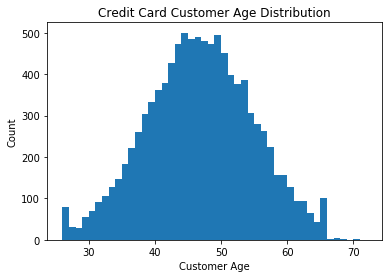

In [6]:
xbins = np.arange(df.Customer_Age.min(),df.Customer_Age.max(),1)
plt.hist(data = df, x = 'Customer_Age', bins = xbins);
plt.xlabel("Customer Age");
plt.ylabel("Count");
plt.title("Credit Card Customer Age Distribution");

In [7]:
df.Customer_Age.mean()

46.32596030413745

**Question**: Is customer's month on book normally distributed? What is the pattern?
- Customer month on book are normally distribution, but comparably many people are on book for 36 months 

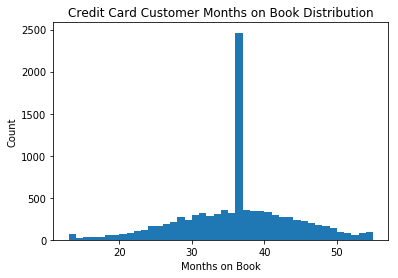

In [8]:
xbins = np.arange(df.Months_on_book.min(),df.Months_on_book.max(),1)
plt.hist(data = df, x = 'Months_on_book', bins = xbins);
plt.xlabel("Months on Book");
plt.ylabel("Count");
plt.title("Credit Card Customer Months on Book Distribution");

In [9]:
df.Months_on_book.mode()

0    36
dtype: int64

**Question**: Are majority credit card customers existing customers? Is it an even split between attrited and existing customers?
- Majority of credit card customers are existing customers with a 83.9% out of total customer population. Only 16.1% customers are attrited customer

In [10]:
df.groupby(['Attrition_Flag']).size()/len(df)

Attrition_Flag
Attrited Customer    0.16066
Existing Customer    0.83934
dtype: float64

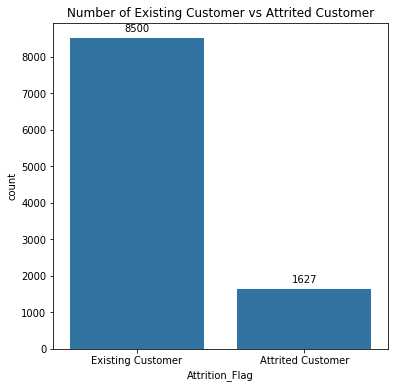

In [11]:
plt.figure(figsize=(6, 6))
base = sns.color_palette()[0]
img = sns.countplot(data = df, x = 'Attrition_Flag',color = base);
for p in img.patches:
    img.annotate(format(p.get_height(),'d'),(p.get_x() + p.get_width() / 2., p.get_height()),\
                 ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.title("Number of Existing Customer vs Attrited Customer");

**Question**: What is the most frequent customer education level?
- Graduate education is the most common level of education for credit card uers.

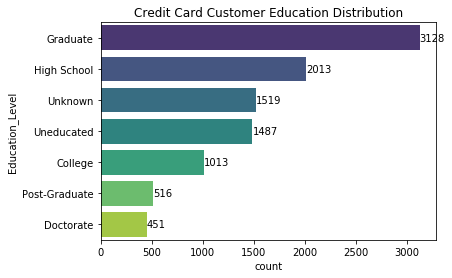

In [12]:
education = df.groupby("Education_Level").size().sort_values(ascending = False)
sns.countplot(data = df, y = 'Education_Level',order = education.index,palette = 'viridis');
for i in range(education.shape[0]):
    count = education[i]
    txt = '{:d}'.format(count)
    plt.text(count+1,i,txt, va = 'center')
plt.title("Credit Card Customer Education Distribution");

In [13]:
df.groupby("Education_Level").size().sort_values(ascending = False)

Education_Level
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
dtype: int64

### Bivariate Variables    

First, examine pariwise correlations between numeric variables

**Question**: Are there any correlated variables? Are they positively or negativelt related?
- Month_on_book and Customer_age are positively correlated
- Avg_Open_To_Buy and Credit_Limit are positively correlated
- Total_Trans_Amt and Total_Trans_Ct are positively correlated
- Avg_Utilization_Ratio and Total_Revolving_Bal are positively correlated
- Avg_Utilization_Ratio is negatively correlated with Credit_Limit as well as Avg_Open_To_Buy 

In [14]:
numeric_vars = ['Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', \
                'Contacts_Count_12_mon', 'Credit_Limit','Total_Revolving_Bal','Avg_Open_To_Buy','Total_Amt_Chng_Q4_Q1',\
                'Total_Trans_Amt','Total_Trans_Ct','Total_Ct_Chng_Q4_Q1','Avg_Utilization_Ratio'] 
categoric_vars = ['Attrition_Flag', 'Gender', 'Education_Level','Marital_Status','Income_Category','Card_Category']

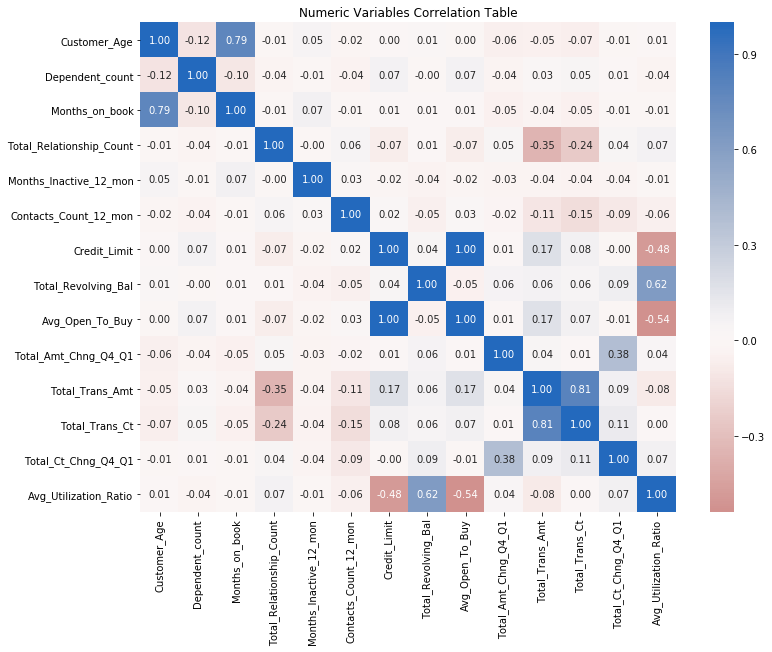

In [38]:
plt.figure(figsize = [12,9])
sns.heatmap(df[numeric_vars].corr(), annot = True, fmt = '.2f', cmap = 'vlag_r', center = 0);
plt.title("Numeric Variables Correlation Table");

**Question**: Are there any intesting trends?
- month on book and customer age has a positive linear relationship with a horizontal line due to the amount of customer have 36 month on the book
- average open to buy has a positive linear relationship with credit limit
- there are many customer with a lower credit limit. As credit limit increase, fewer customers are qualified

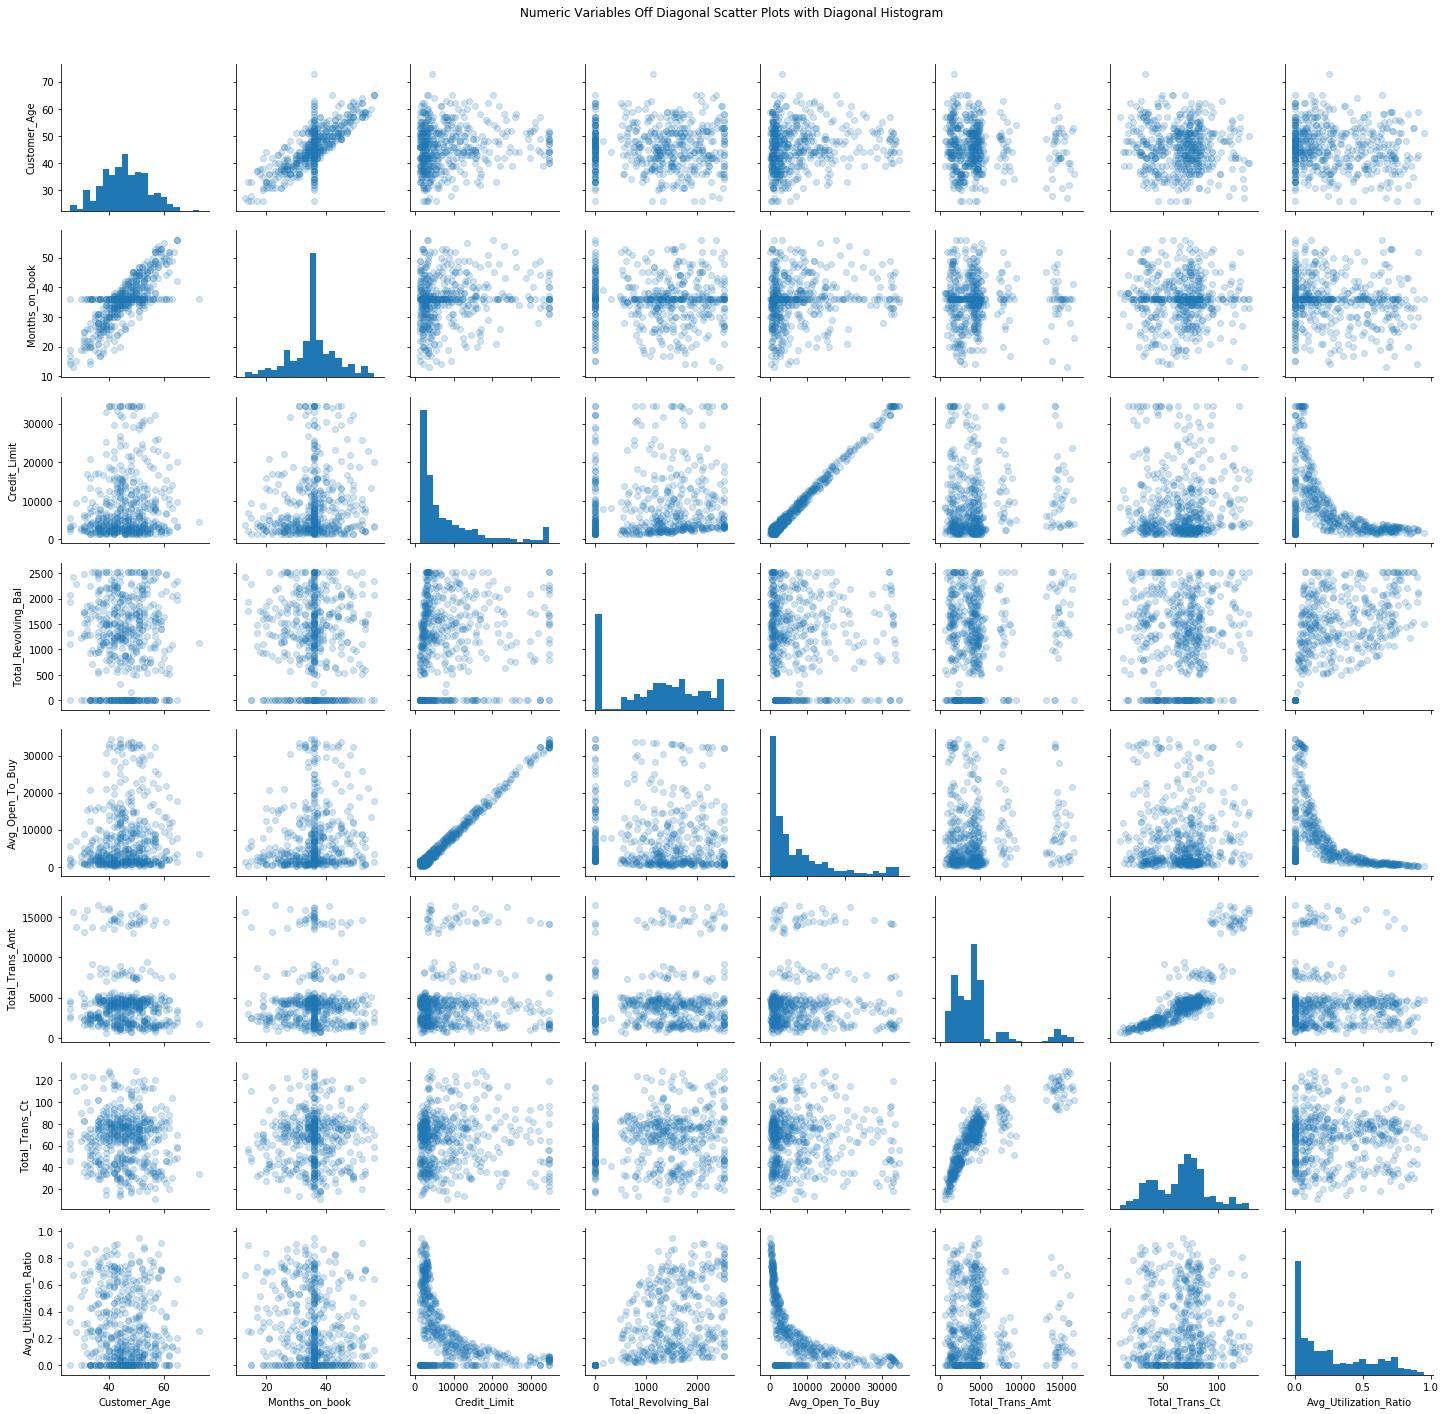

In [31]:
#select 500 random samples
samples = np.random.choice(df.shape[0], 500, replace = False) 
df_samp = df.loc[samples,:]
select_num_var = ['Customer_Age', 'Months_on_book', 'Credit_Limit','Total_Revolving_Bal','Avg_Open_To_Buy',\
                'Total_Trans_Amt','Total_Trans_Ct','Avg_Utilization_Ratio']
g = sns.PairGrid(data = df_samp, vars = select_num_var)
g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter, alpha =1/5);
plt.subplots_adjust(top=0.94);
g.fig.suptitle('Numeric Variables Off Diagonal Scatter Plots with Diagonal Histogram');

Then, trying to examine between categorical variables
**Question**: What is the pattern of total transaction amount for existing or attrited customers? What is the difference between different credit card category?
- It appears that existing customers on average have a higher transaction amount, and credit card type ranks from the lowest Blue card to the highest Platium with higher transaction amount.

<Figure size 720x720 with 0 Axes>

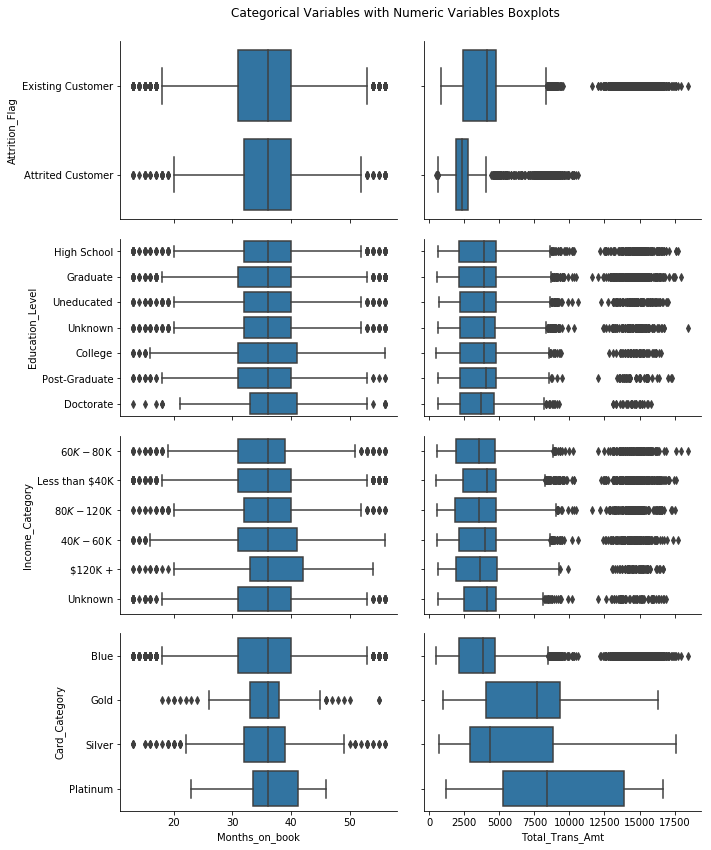

In [30]:
select_cat_vars = ['Attrition_Flag','Education_Level','Income_Category','Card_Category']
def boxgrid(x, y, **kwargs):
    #create box plots with seaborn PairGrid
    base = sns.color_palette()[0]
    sns.boxplot(x, y, color = base);
plt.figure(figsize = [10, 10]);
g = sns.PairGrid(data = df, x_vars = ['Months_on_book', 'Total_Trans_Amt'], y_vars = select_cat_vars,\
                 size = 3, aspect = 1.5);
g.map(boxgrid);
plt.subplots_adjust(top=0.94)
g.fig.suptitle('Categorical Variables with Numeric Variables Boxplots');

**Question**: Is income associated with the level of education?
- For each education level, it seems customers with less than \$40k income play a major role   

**Question**: What is the most popular credit card type?          
- Blue Card is the most popular credit card type        

**Question**: How is gender associated with education?    
- Both female and male follow the same trend, majority of credit card customers have graduate degree 

**Question**: Are most credit card users married?     
- Majory of credit card customers are married

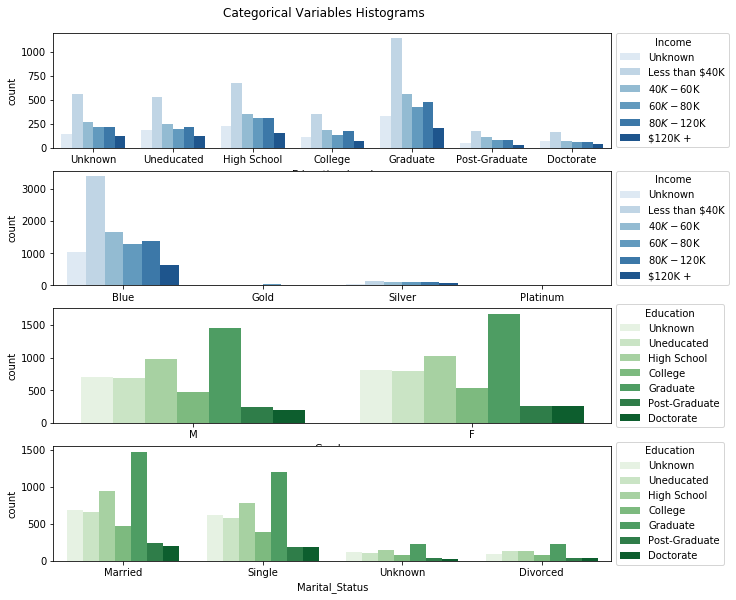

In [40]:
income_order = ['Unknown','Less than $40K','$40K - $60K','$60K - $80K','$80K - $120K','$120K +']
edu_order = ['Unknown','Uneducated','High School','College','Graduate','Post-Graduate','Doctorate']
fig = plt.figure(figsize = [10,9]);
plt.subplots_adjust(top=0.94);
st = fig.suptitle("Categorical Variables Histograms");
#subplot 1
plt.subplot(4,1,1)
sns.countplot(data = df, x = 'Education_Level', order = edu_order, \
              hue = 'Income_Category', hue_order = income_order, palette = 'Blues');
plt.legend(loc = 6, bbox_to_anchor = (1,0.5), title = "Income");

#subplot 2
plt.subplot(4,1,2)
sns.countplot(data = df, x = 'Card_Category', hue = 'Income_Category', hue_order = income_order,\
              palette = 'Blues');
plt.legend(loc = 6, bbox_to_anchor = (1,0.5), title = "Income");
#subplot 3
plt.subplot(4,1,3)
sns.countplot(data = df, x = 'Gender', hue = 'Education_Level', hue_order = edu_order, \
              palette = 'Greens');
plt.legend(loc = 6, bbox_to_anchor = (1,0.5), title = "Education");
#subplot 4
plt.subplot(4,1,4)
sns.countplot(data = df, x = 'Marital_Status', hue = 'Education_Level', \
              hue_order = edu_order, palette = 'Greens');
plt.legend(loc = 6, bbox_to_anchor = (1,0.5), title = "Education");


### Multivariate Exploration

**Question**:What are the relationships among income, age, and month on book?
- There is a slight trend that with a higher income, when customers are more senior, they tend to be more loyal to the company. Especially for income category \$120k+ group, the major distribution lands slightly towards top right corner.

In [19]:
print(df.Customer_Age.min(),df.Customer_Age.max())
print(df.Months_on_book.min(),df.Months_on_book.max())

26 73
13 56


In [20]:
def hist2d_cust(x, y, **kwargs):
    palette = kwargs.pop('color')
    bins_x = np.arange(25, 76, 2) 
    bins_y = np.arange(12, 56, 2)
    plt.hist2d(x, y, bins = [bins_x,bins_y], cmap = palette, cmin = 0.5) 
    plt.colorbar()

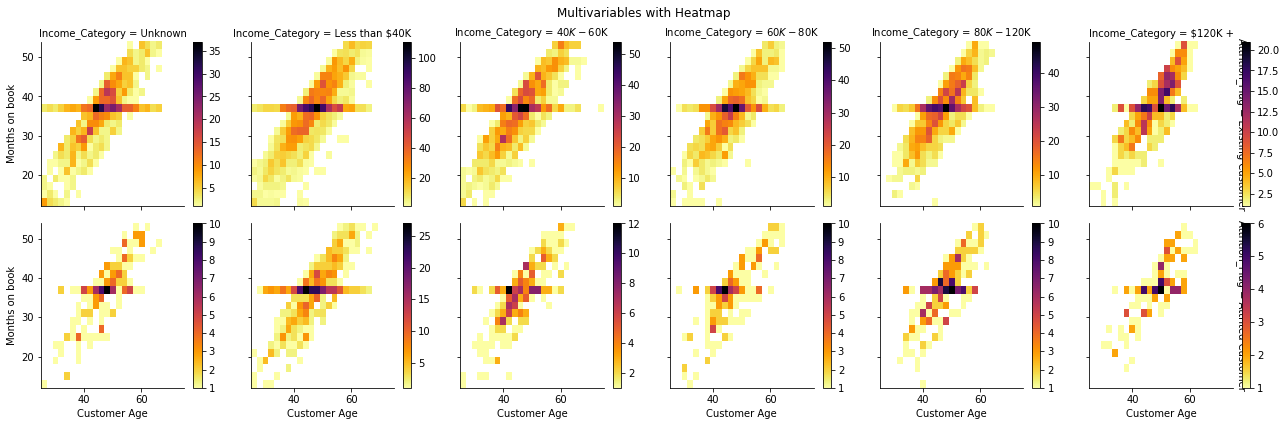

In [43]:
g = sns.FacetGrid(data = df, row = 'Attrition_Flag', col ='Income_Category', col_order = income_order,margin_titles = True)
g.map(hist2d_cust,'Customer_Age','Months_on_book',color = 'inferno_r')
g.set_xlabels('Customer Age');
g.set_ylabels('Months on book');
plt.subplots_adjust(top=0.9);
g.fig.suptitle('Multivariables with Heatmap');

**Question**: Is it the case that customers with higher income tend to be more sticky?
- The trend is more obvious for customer with high school education that if they earn more, they are more likely to stay on the book
- In addition, customers with college degree and earnings \$120k+ are sticky customers

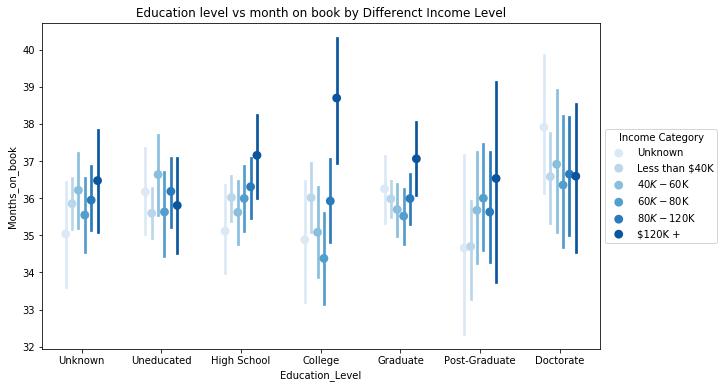

In [22]:
plt.figure(figsize = [10,6])
sns.pointplot(data = df, x = 'Education_Level', order = edu_order, y = 'Months_on_book', \
              hue = 'Income_Category', hue_order = income_order, palette = 'Blues', linestyles = '', dodge = 0.4);
plt.legend(loc = 6,bbox_to_anchor = (1,0.5),title = "Income Category");
plt.title("Education level vs month on book by Differenct Income Level");

In [23]:
df['Education_Level'].value_counts()

Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64

In [44]:
!jupyter nbconvert "Project 5 - Credit Card Customers.ipynb" --to slides --post serve --no-input --no-prompt 

[NbConvertApp] WARNING | Config option `kernel_spec_manager_class` not recognized by `NbConvertApp`.
[NbConvertApp] Converting notebook Project 5 - Credit Card Customers.ipynb to slides
[NbConvertApp] Writing 945345 bytes to Project 5 - Credit Card Customers.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Project 5 - Credit Card Customers.slides.html
Use Control-C to stop this server
^C

Interrupted
